In [1]:
import nltk

In [3]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\bkabra\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.cluster import KMeans

In [17]:
df = pd.read_excel("bert_sample.xlsx")
df.head()

,ITEM_NAME,CATEGORY_ID
0,CALIBRACION TRANSDUCER 75 nm,CAPITAL ASSEMBLY
1,for pusher whskey,CAPITAL ASSEMBLY
2,Stat 40B Press Head Cup to Carrier from Stati...,CAPITAL ASSEMBLY
3,TRANSD. Cable (4145097103) scrw,CAPITAL ASSEMBLY
4,"ZT200 7,5BAR,13BAR60HZ NUMERO DE SERIE: AIF09...",CAPITAL ASSEMBLY


In [18]:
df["CATEGORY_ID"].value_counts()

CUTTING TOOLS        5000
CHEMICALS            2000
CAPITAL ASSEMBLY     2000
LOGISTICS SERVICE    1000
Name: CATEGORY_ID, dtype: int64

In [19]:
def to_class(data):
    if data == "CUTTING TOOLS":
        return 0
    elif data == "CHEMICALS":
        return 1
    elif data == "CAPITAL ASSEMBLY":
        return 2
    else: 
        return 3

df['CATEGORY_ID'] = df.CATEGORY_ID.apply(to_class)
df.head()

,ITEM_NAME,CATEGORY_ID
0,CALIBRACION TRANSDUCER 75 nm,2
1,for pusher whskey,2
2,Stat 40B Press Head Cup to Carrier from Stati...,2
3,TRANSD. Cable (4145097103) scrw,2
4,"ZT200 7,5BAR,13BAR60HZ NUMERO DE SERIE: AIF09...",2


### Exploratory Data Analysis
Let's check out some of the stats with some plots and the built-in methods in pandas!

In [20]:
df.describe()

,CATEGORY_ID
count,10000.000000
mean,0.900000
std,1.044083
min,0.000000
25%,0.000000
50%,0.500000
75%,2.000000
max,3.000000


In [21]:
df.groupby('CATEGORY_ID').describe()

ITEM_NAME         \
                count unique   
CATEGORY_ID                    
0                5000   5000   
1                2000   2000   
2                2000   2000   
3                1000   1000   

                                                                     
                                                           top freq  
CATEGORY_ID                                                          
0            015-2515-3U END MILL R1 X 10 (D4) HSLB 2020-10...    1  
1                                       DIOXIDO DE CARBONO CIL    1  
2                 FESTO MSFG-24/42-50/60 SOLENOID COIL 24 VOLT    1  
3            COSTO DE MANO DE OBRA DE (2)  TECNICOS DE 8:00...    1

In [22]:
df['length'] = df['ITEM_NAME'].apply(len)
df.head()

,ITEM_NAME,CATEGORY_ID,length
0,CALIBRACION TRANSDUCER 75 nm,2,29
1,for pusher whskey,2,18
2,Stat 40B Press Head Cup to Carrier from Stati...,2,86
3,TRANSD. Cable (4145097103) scrw,2,32
4,"ZT200 7,5BAR,13BAR60HZ NUMERO DE SERIE: AIF09...",2,86


### Data Visualization
Let's visualize this! Let's do the imports:

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

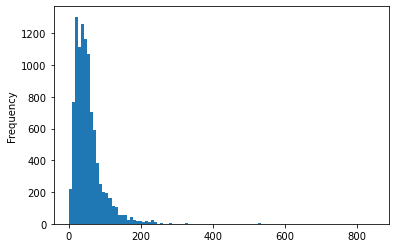

In [24]:
df['length'].plot(bins=100, kind='hist')

In [25]:
df.length.describe()

count    10000.00000
mean        54.28300
std         41.56225
min          1.00000
25%         28.00000
50%         46.00000
75%         67.00000
max        845.00000
Name: length, dtype: float64

In [26]:
df[df['length'] == 845]['ITEM_NAME'].iloc[0]

'0.625 IATF 16949 Pre-Planning (.5 day Performed off-site & 1 hour  pre-audit meeting performed on-site) by Cheryl Pikus 1,350.00 843.75  IATF 16949 Recertification audit performed by Cheryl Pikus  and Jacob Jarosinki - TS - RE - November 30- December 1,  2017  3.5 1,350.00 4,725.00  0.75 IATF 16949 Technical Report Writing 1,350.00 1,012.50  1 IATF Maintenance Fee 250.00 250.00  Audit Expense Subtotal 6,831.25  1 Hotel 334.62 334.62  1 Car rental 64.72 64.72  1 Rental car gasoline fill up 13.33 13.33  1 Toll Roads 5.65 5.65  10 Mileage at .535¢ per mile - (to/from National Car Rental) 0.535 5.35  2 Per diem ($51.00 per day) 51.00 102.00  Travel Expense Subtotal - Cheryl Pikus 525.67  1 Hotel 353.34 353.34  1 Taxi 25.13 25.13  1 Train 3.22 3.22  2 Per diem ($51.00 per day) 51.00 102.00  Travel Expense Subtotal - Jacob Jarosinki 483.69'

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

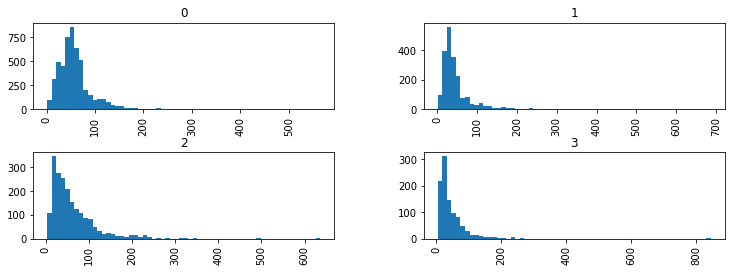

In [27]:
df.hist(column='length', by='CATEGORY_ID', bins=60,figsize=(12,4))

In [28]:
import string
from nltk.corpus import stopwords
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [29]:
df.head()

,ITEM_NAME,CATEGORY_ID,length
0,CALIBRACION TRANSDUCER 75 nm,2,29
1,for pusher whskey,2,18
2,Stat 40B Press Head Cup to Carrier from Stati...,2,86
3,TRANSD. Cable (4145097103) scrw,2,32
4,"ZT200 7,5BAR,13BAR60HZ NUMERO DE SERIE: AIF09...",2,86


In [30]:
# Reducing the lenght of the words 
def item_lenght_red(data):
    return data[:100]

df["ITEM_NAME"] = df["ITEM_NAME"].apply(item_lenght_red)
df["length"] = df["ITEM_NAME"].apply(len)
df.head()

,ITEM_NAME,CATEGORY_ID,length
0,CALIBRACION TRANSDUCER 75 nm,2,29
1,for pusher whskey,2,18
2,Stat 40B Press Head Cup to Carrier from Stati...,2,86
3,TRANSD. Cable (4145097103) scrw,2,32
4,"ZT200 7,5BAR,13BAR60HZ NUMERO DE SERIE: AIF09...",2,86


In [31]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['ITEM_NAME'])

In [32]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

19206


In [33]:
catergory_bow = bow_transformer.transform(df['ITEM_NAME'])

In [34]:
print('Shape of Sparse Matrix: ', catergory_bow.shape)
print('Amount of Non-Zero occurences: ', catergory_bow.nnz)

Shape of Sparse Matrix:  (10000, 19206)
Amount of Non-Zero occurences:  63527


In [35]:
tfidf_transformer = TfidfTransformer().fit(catergory_bow)

In [36]:
category_tfidf = tfidf_transformer.transform(catergory_bow)
print(category_tfidf.shape)

(10000, 19206)


In [37]:
k = 20
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=5,
                verbose=1)
km.fit(category_tfidf)

Initialization complete
Iteration 0, inertia 18804.831406930396
Iteration 1, inertia 9643.38516934116
Iteration 2, inertia 9604.4401915202
Iteration 3, inertia 9584.310099241053
Iteration 4, inertia 9573.890460658095
Iteration 5, inertia 9562.277428781166
Iteration 6, inertia 9551.386156727247
Iteration 7, inertia 9544.570293546536
Iteration 8, inertia 9539.500146272989
Iteration 9, inertia 9535.63857416666
Iteration 10, inertia 9535.42677543378
Iteration 11, inertia 9535.291471944583
Iteration 12, inertia 9535.17303947741
Iteration 13, inertia 9535.100454181309
Iteration 14, inertia 9534.88127173634
Iteration 15, inertia 9534.783126991108
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 18708.46370210968
Iteration 1, inertia 9618.001880642103
Iteration 2, inertia 9568.277441704899
Iteration 3, inertia 9556.940861412699
Iteration 4, inertia 9550.581560488567
Iteration 5, inertia 9545.9564110364
Iteration 6, inertia 9541.09437859074
Iteration 7

KMeans(max_iter=100, n_clusters=20, n_init=5, verbose=1)

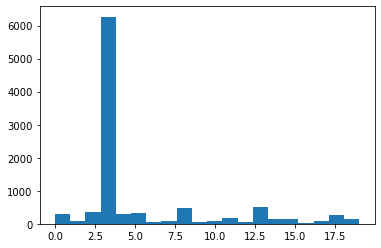

In [38]:
plt.hist(km.labels_, bins=k)
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(category_tfidf)

KMeans(n_clusters=4)

In [40]:
set(kmeans.labels_.tolist())

{0, 1, 2, 3}

In [41]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['CATEGORY_ID'],kmeans.labels_))
print(classification_report(df['CATEGORY_ID'],kmeans.labels_))

[[4464   27  499   10]
 [1837   90    0   73]
 [1414  436    1  149]
 [ 921   18    0   61]]
              precision    recall  f1-score   support

           0       0.52      0.89      0.65      5000
           1       0.16      0.04      0.07      2000
           2       0.00      0.00      0.00      2000
           3       0.21      0.06      0.09      1000

    accuracy                           0.46     10000
   macro avg       0.22      0.25      0.20     10000
weighted avg       0.31      0.46      0.35     10000

